In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('twitter_validation (1).csv',header=None,encoding='ISO-8859-1') # Encoding=collect special characters and emojis and other languages
df.columns=['id','social','target','text']
df

,id,social,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [2]:
df.head()

,id,social,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [3]:
df.tail()

,id,social,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [4]:
df.dtypes

id         int64
social    object
target    object
text      object
dtype: object

In [5]:
df.isna().sum()

id        0
social    0
target    0
text      0
dtype: int64

In [6]:
df.shape

(1000, 4)

In [7]:
n1=df['target'].value_counts()

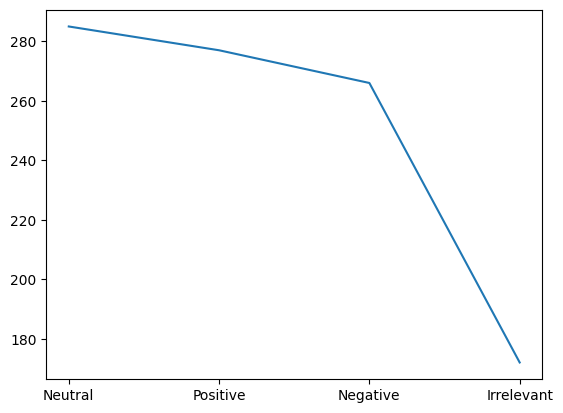

In [8]:
plt.plot(n1.index,n1.values)

<BarContainer object of 32 artists>

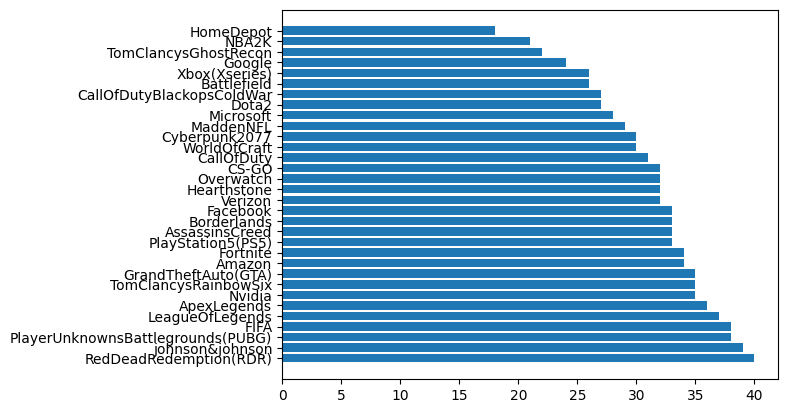

In [9]:
n3=df['social'].value_counts()
plt.barh(n3.index,n3.values)

C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\SIJIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 134 (\x

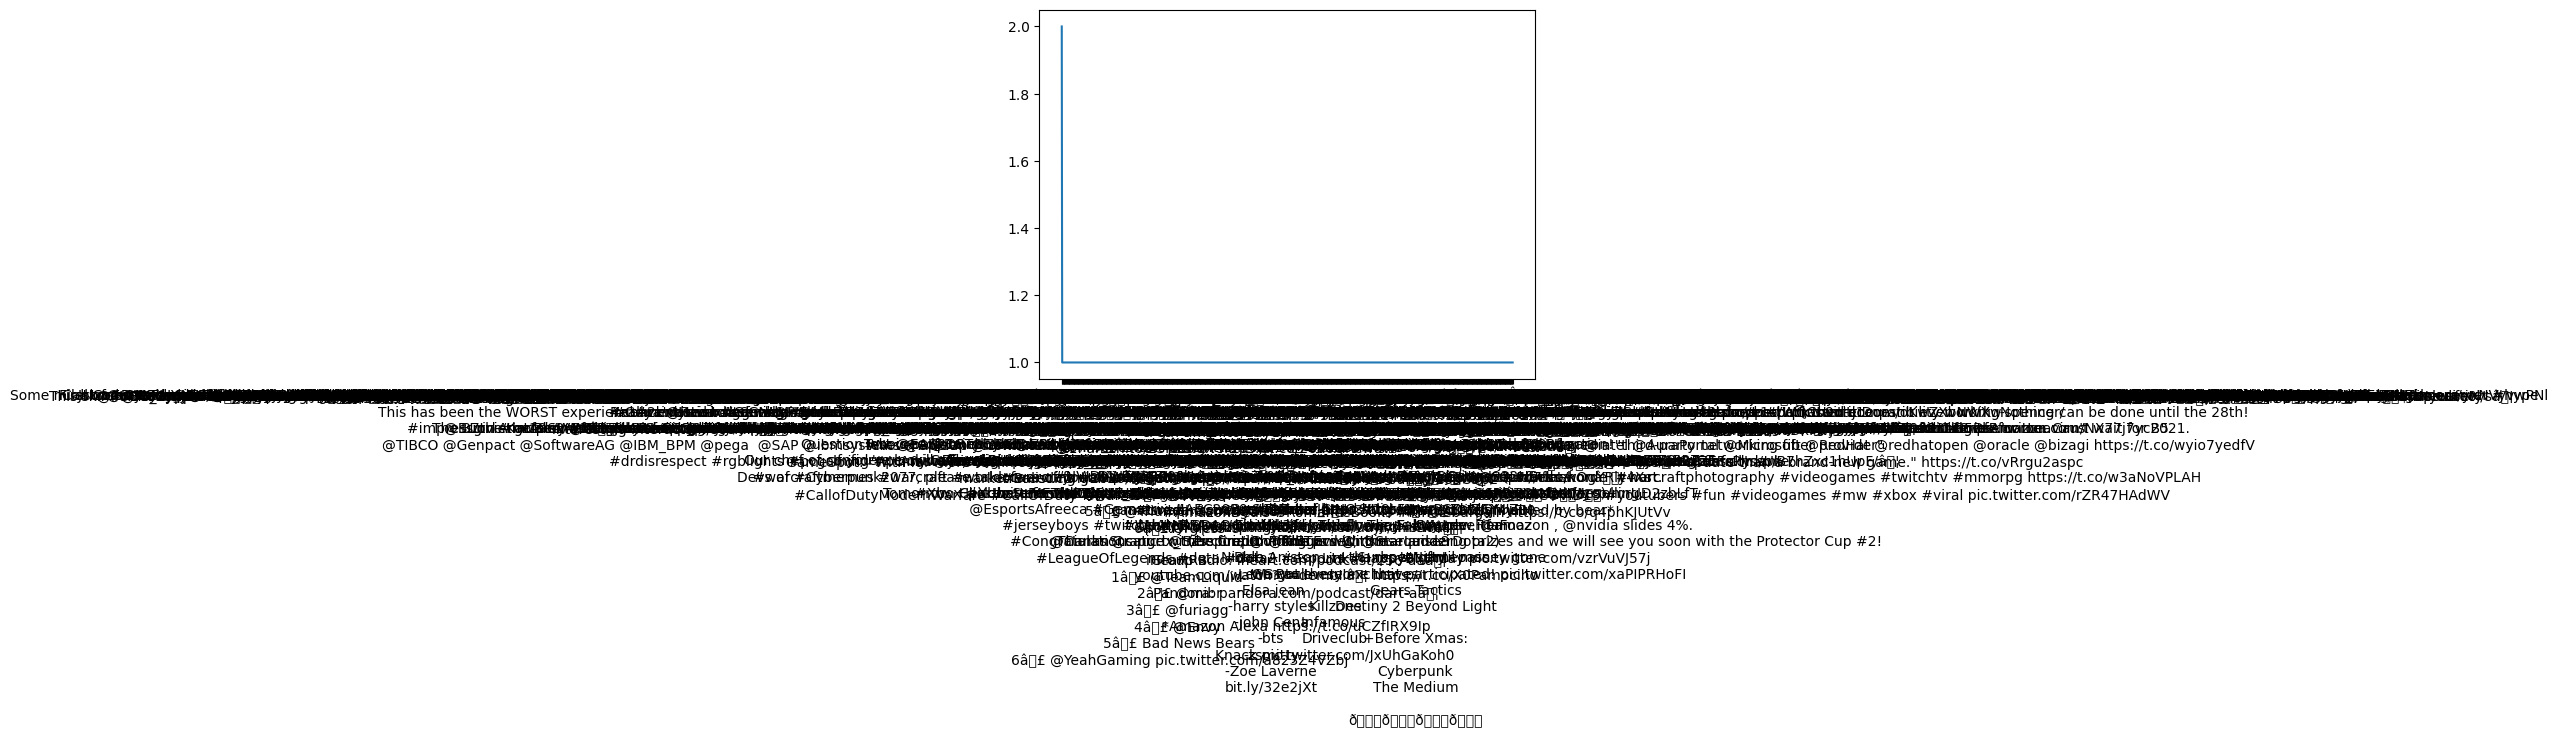

In [10]:
n4=df['text'].value_counts()  
plt.plot(n4.index,n4.values)

In [11]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True) #Remove irrevalent in target
df

,id,social,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
df.reset_index(drop=True,inplace=True)
df

,id,social,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
df.drop(['id','social'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
# df.loc[df["target"]=="Positive","target"]=1
# df.loc[df["target"]=="Negative","target"]=-1
# df.loc[df["target"]=="Neutral","target"]=0
# df.dtypes
#Another method
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [15]:
tweet=df.text 
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [16]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [17]:
#Remove Special Characters             string replace method
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [18]:
#Len words  above 3
tweet=tweet.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweet

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [19]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [21]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>
  Coords	Values
  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.25069214907989

In [22]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [23]:
#input === data
#output === y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7222 stored elements and shape (579, 3763)>

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([-1,  1,  1,  0, -1, -1, -1,  0, -1,  0,  0,  1,  0,  1, -1, -1, -1,
       -1, -1,  1, -1,  0,  0,  1,  0,  1,  1, -1, -1,  1,  0,  1, -1,  1,
        1, -1,  0, -1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  1,  0,  1,  0,
       -1,  1,  1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0, -1, -1, -1,  0,
        1,  0,  1,  0,  1, -1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1, -1,  0,  0,  0,  1,  1,  0, -1,  0,  1, -1,  0, -1, -1,
        0,  0,  0,  1,  0,  1,  1, -1, -1,  0,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,
       -1, -1,  0,  1,  0,  0,  0, -1,  0, -1,  0,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1, -1,  1,  0, -1,  1, -1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  0,  1,  1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  1, -1, -1,  0, -1,  0,  0,
        0, -1, -1,  1,  1

In [25]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.5863453815261044
              precision    recall  f1-score   support

          -1       0.53      0.65      0.58        65
           0       0.65      0.47      0.55       108
           1       0.58      0.70      0.63        76

    accuracy                           0.59       249
   macro avg       0.59      0.61      0.59       249
weighted avg       0.60      0.59      0.58       249

